<a href="https://colab.research.google.com/github/ugurcun/Trafik-Kazalar-Analiz/blob/main/Trafik_Kazalar%C4%B1_Analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv('accidents_2005_to_2007.csv')
df2 = pd.read_csv('accidents_2009_to_2011.csv')
df3 = pd.read_csv('accidents_2012_to_2014.csv')

<ipython-input-2-4df79fdb4f6d>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('accidents_2012_to_2014.csv')


In [3]:
accidents = pd.concat([df1, df2, df3], axis=0)


In [4]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1.0,2.0,1.0,1.0,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002849,2005.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1.0,3.0,1.0,1.0,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002909,2005.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1.0,3.0,2.0,1.0,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002857,2005.0
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1.0,3.0,1.0,1.0,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002840,2005.0
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1.0,3.0,1.0,1.0,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002863,2005.0


In [5]:
print(accidents.isnull().sum())

Accident_Index                                       0
Location_Easting_OSGR                               87
Location_Northing_OSGR                              87
Longitude                                           88
Latitude                                            89
Police_Force                                         3
Accident_Severity                                    3
Number_of_Vehicles                                   3
Number_of_Casualties                                 3
Date                                                 3
Day_of_Week                                          3
Time                                                92
Local_Authority_(District)                           3
Local_Authority_(Highway)                            3
1st_Road_Class                                       3
1st_Road_Number                                      3
Road_Type                                            3
Speed_limit                                          3
Junction_D

In [6]:
# Handle missing values
# 1. Drop columns with a high percentage of missing values
threshold = 0.7 # Define a threshold (e.g., 70%)
columns_to_drop = accidents.columns[accidents.isnull().mean() > threshold]
accidents = accidents.drop(columns=columns_to_drop)

# 2. Impute missing values in numerical columns with the mean or median
numerical_cols = accidents.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if accidents[col].isnull().any():
        # Use median for robustness to outliers
        accidents[col] = accidents[col].fillna(accidents[col].median())

# 3. Impute missing values in categorical columns with the mode
categorical_cols = accidents.select_dtypes(include='object').columns
for col in categorical_cols:
    if accidents[col].isnull().any():
        accidents[col] = accidents[col].fillna(accidents[col].mode()[0])

# Verify the number of missing values after handling
print("\nMissing values after handling:")
print(accidents.isnull().sum())



Missing values after handling:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                       

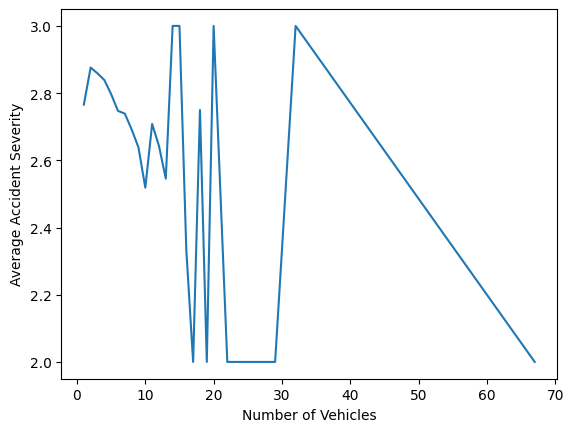

Accident_Severity             1.000000
Number_of_Vehicles            0.078521
2nd_Road_Class                0.063950
2nd_Road_Number               0.025495
Longitude                     0.014048
Location_Easting_OSGR         0.013687
1st_Road_Class                0.010920
Day_of_Week                   0.002625
Year                         -0.003740
1st_Road_Number              -0.004804
Police_Force                 -0.029965
Local_Authority_(District)   -0.030426
Latitude                     -0.031838
Location_Northing_OSGR       -0.031888
Speed_limit                  -0.077552
Number_of_Casualties         -0.080134
Urban_or_Rural_Area          -0.080625
Name: Accident_Severity, dtype: float64


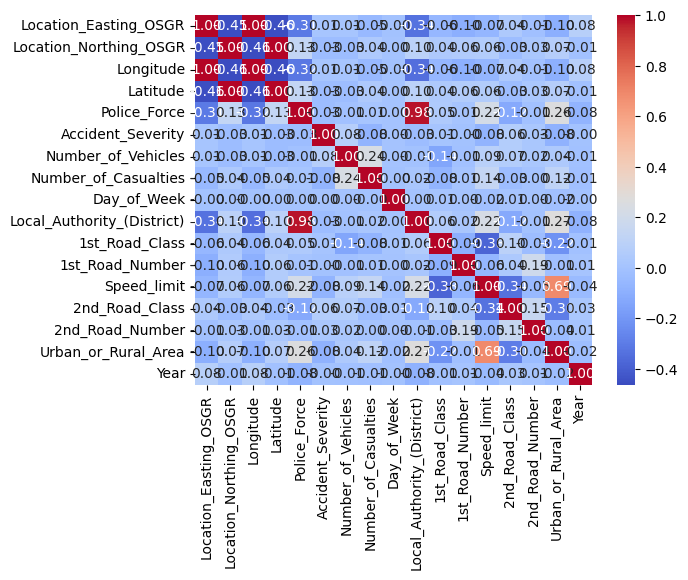

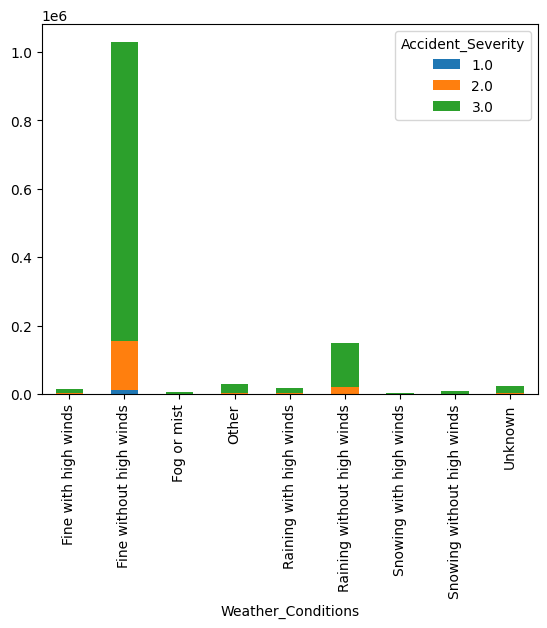

<ipython-input-12-02769587d947>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  accidents_by_month = accidents.resample('M').sum()['Accident_Count'] # Example using monthly data


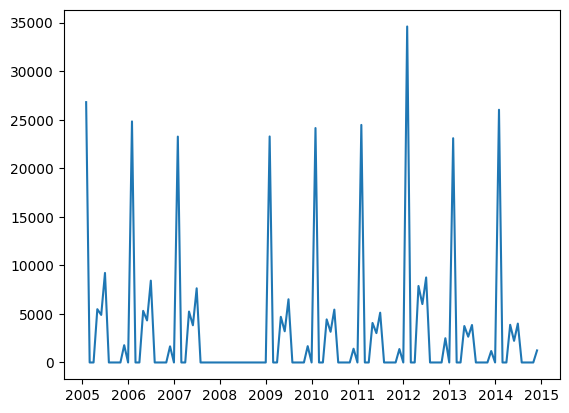

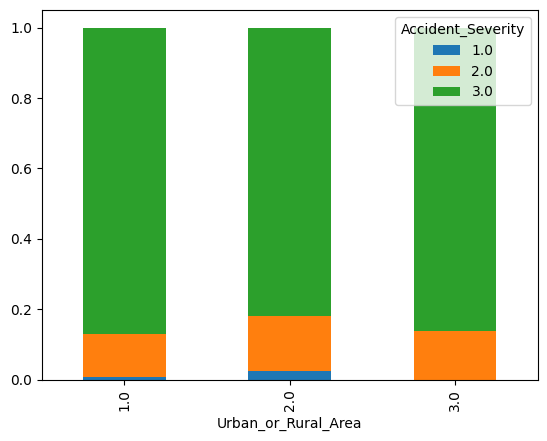

Urban_or_Rural_Area
1.0    2.863159
2.0    2.795036
3.0    2.863248
Name: Accident_Severity, dtype: float64


In [12]:
# 1. Trafik akışının değişmesi kazaları nasıl etkiler?
# Analyze the relationship between traffic volume/density and accident severity/frequency.
# (Requires traffic volume data, which is not currently in the dataset.)
# Example (assuming a 'TrafficVolume' column exists):
accidents.groupby('Number_of_Vehicles')['Accident_Severity'].mean().plot() # Group by 'Number_of_Vehicles' instead
plt.xlabel('Number of Vehicles') # Update x-axis label
plt.ylabel('Average Accident Severity')
plt.show()

# 2. Kaza oranlarını ne artırır?
# Identify factors contributing to higher accident rates using correlation analysis or statistical tests.
# Example:
# Select only numerical features for correlation analysis
numerical_features = accidents.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr() # Calculate correlation on numerical features only
print(correlation_matrix['Accident_Severity'].sort_values(ascending=False))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Investigate the impact of weather conditions, road surface, time of day, etc. on accident rates.
# Example:
accidents.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.show()


# 3. Zaman içinde kaza oranlarını tahmin edebilir miyiz?
# Time series analysis to forecast accident rates (requires a proper time index).
# Example (assuming 'Date' column is a datetime object):
# Assuming the date information is in the 'Accident_Index' column
# Extract date from 'Accident_Index' (e.g., if it's in the format '200501BS00001')
accidents['Date'] = pd.to_datetime(accidents['Accident_Index'].str[:6], format='%Y%m', errors='coerce')
accidents = accidents.set_index('Date')

# Convert 'Accident_Count' to numeric, handling errors
# If there is no 'Accident_Count' column, create one based on accident occurrences
accidents['Accident_Count'] = 1
accidents_by_month = accidents.resample('M').sum()['Accident_Count'] # Example using monthly data
plt.plot(accidents_by_month)
plt.show()


# 4. Kırsal ve kentsel alanlar nasıl farklılaştı?
# Compare accident statistics (frequency, severity) between rural and urban areas.
# Assuming a 'Urban_or_Rural_Area' column exists:
accidents.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.show()

# Example: Calculate the mean severity for each area type
print(accidents.groupby('Urban_or_Rural_Area')['Accident_Severity'].mean())


# Add more analysis as needed using the available data and domain knowledge.